# color with hsv

HSL (hue, saturation, lightness) and HSV (hue, saturation, value) are alternative representations of the RGB color model,

In [140]:
from sklearn.cluster import KMeans
from collections import Counter
import cv2 #for resizing image
import numpy as np
import json

In [112]:
def get_dominant_color(image, k=4, image_processing_size = (25, 25)):
    """
    takes an image as input
    returns the dominant color of the image as a list
    
    dominant color is found by running k means on the 
    pixels & returning the centroid of the largest cluster

    processing time is sped up by working with a smaller image; 
    this resizing can be done with the image_processing_size param 
    which takes a tuple of image dims as input

    >>> get_dominant_color(my_image, k=4, image_processing_size = (25, 25))
    [56.2423442, 34.0834233, 70.1234123]
    """
    #resize image if new dims provided
#     image = cv2.imread(image)
    if image_processing_size is not None:
        image = cv2.resize(image, image_processing_size, 
                            interpolation = cv2.INTER_AREA)
    
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(image)

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
    dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
    dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]

    return list(dominant_color_1), list(dominant_color_2), list(dominant_color_3)


Most prominent color:
red: 9  green:  13  blue:  15 
Hex:  #090d0f

Second color:
red: 220  green:  13  blue:  203 
Hex:  #dcd5cb

Third color:
red: 9  green:  13  blue:  16 
Hex:  #090e10


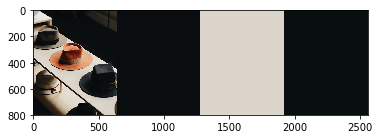


Most prominent color:
red: 231  green:  231  blue:  235 
Hex:  #e7e7eb

Second color:
red: 204  green:  231  blue:  212 
Hex:  #ccd1d4

Third color:
red: 151  green:  231  blue:  130 
Hex:  #979282


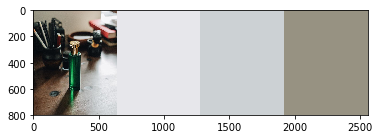


Most prominent color:
red: 205  green:  211  blue:  215 
Hex:  #cdd3d7

Second color:
red: 213  green:  211  blue:  220 
Hex:  #d5d9dc

Third color:
red: 195  green:  211  blue:  205 
Hex:  #c3c9cd


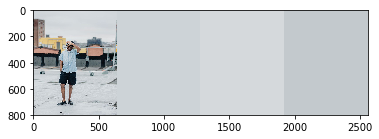


Most prominent color:
red: 51  green:  80  blue:  85 
Hex:  #335055

Second color:
red: 55  green:  80  blue:  89 
Hex:  #375459

Third color:
red: 47  green:  80  blue:  81 
Hex:  #2f4c51


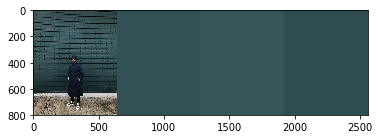


Most prominent color:
red: 195  green:  133  blue:  102 
Hex:  #c38566

Second color:
red: 188  green:  133  blue:  72 
Hex:  #bc6b48

Third color:
red: 191  green:  133  blue:  56 
Hex:  #bf6038


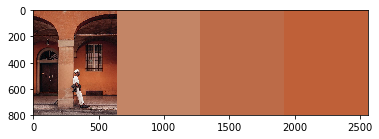


Most prominent color:
red: 182  green:  179  blue:  168 
Hex:  #b6b3a8

Second color:
red: 183  green:  179  blue:  175 
Hex:  #b7b6af

Third color:
red: 175  green:  179  blue:  159 
Hex:  #afab9f


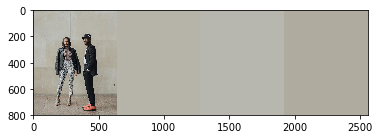


Most prominent color:
red: 182  green:  173  blue:  167 
Hex:  #b6ada7

Second color:
red: 212  green:  173  blue:  175 
Hex:  #d4c0af

Third color:
red: 222  green:  173  blue:  187 
Hex:  #decbbb


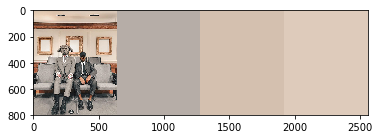


Most prominent color:
red: 173  green:  166  blue:  155 
Hex:  #ada69b

Second color:
red: 164  green:  166  blue:  145 
Hex:  #a49d91

Third color:
red: 169  green:  166  blue:  148 
Hex:  #a9a594


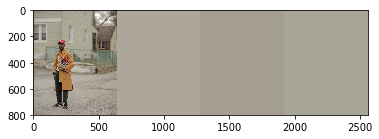


Most prominent color:
red: 138  green:  71  blue:  61 
Hex:  #8a473d

Second color:
red: 27  green:  71  blue:  50 
Hex:  #1b2832

Third color:
red: 42  green:  71  blue:  74 
Hex:  #2a3c4a


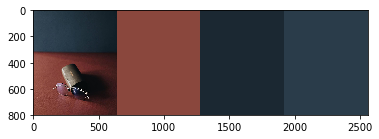


Most prominent color:
red: 0  green:  0  blue:  0 
Hex:  #000000

Second color:
red: 169  green:  0  blue:  56 
Hex:  #a98738

Third color:
red: 181  green:  0  blue:  71 
Hex:  #b59b47


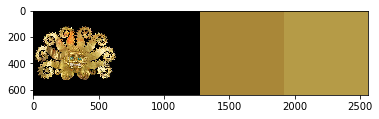


Most prominent color:
red: 230  green:  230  blue:  230 
Hex:  #e6e6e6

Second color:
red: 223  green:  230  blue:  223 
Hex:  #dfdfdf

Third color:
red: 216  green:  230  blue:  214 
Hex:  #d8d7d6


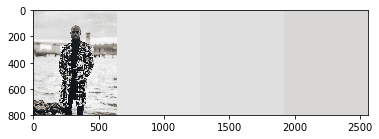


Most prominent color:
red: 207  green:  202  blue:  190 
Hex:  #cfcabe

Second color:
red: 222  green:  202  blue:  215 
Hex:  #dedcd7

Third color:
red: 213  green:  202  blue:  207 
Hex:  #d5d3cf


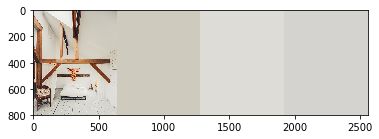


Most prominent color:
red: 213  green:  214  blue:  208 
Hex:  #d5d6d0

Second color:
red: 194  green:  214  blue:  188 
Hex:  #c2c3bc

Third color:
red: 200  green:  214  blue:  195 
Hex:  #c8c9c3


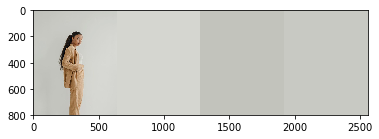


Most prominent color:
red: 97  green:  92  blue:  81 
Hex:  #615c51

Second color:
red: 111  green:  92  blue:  92 
Hex:  #6f685c

Third color:
red: 135  green:  92  blue:  109 
Hex:  #877a6d


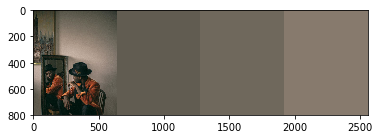


Most prominent color:
red: 75  green:  83  blue:  86 
Hex:  #4b5356

Second color:
red: 93  green:  83  blue:  84 
Hex:  #5d5c54

Third color:
red: 60  green:  83  blue:  71 
Hex:  #3c4447


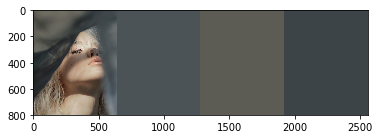


Most prominent color:
red: 183  green:  99  blue:  68 
Hex:  #b76344

Second color:
red: 194  green:  99  blue:  102 
Hex:  #c28566

Third color:
red: 71  green:  99  blue:  29 
Hex:  #47271d


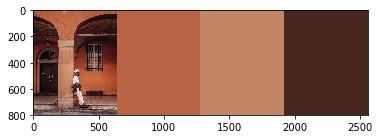


Most prominent color:
red: 14  green:  20  blue:  25 
Hex:  #0e1419

Second color:
red: 24  green:  20  blue:  42 
Hex:  #18212a

Third color:
red: 28  green:  20  blue:  65 
Hex:  #1c4341


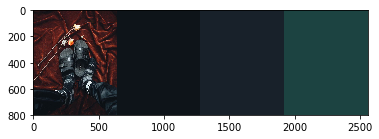


Most prominent color:
red: 160  green:  139  blue:  127 
Hex:  #a08b7f

Second color:
red: 137  green:  139  blue:  106 
Hex:  #89756a

Third color:
red: 147  green:  139  blue:  121 
Hex:  #938279


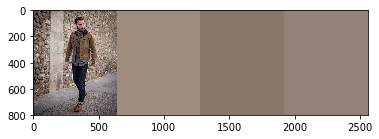


Most prominent color:
red: 146  green:  142  blue:  124 
Hex:  #928e7c

Second color:
red: 163  green:  142  blue:  159 
Hex:  #a3a99f

Third color:
red: 173  green:  142  blue:  172 
Hex:  #adb4ac


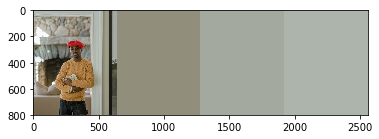


Most prominent color:
red: 122  green:  148  blue:  158 
Hex:  #7a949e

Second color:
red: 116  green:  148  blue:  152 
Hex:  #748d98

Third color:
red: 110  green:  148  blue:  145 
Hex:  #6e8591


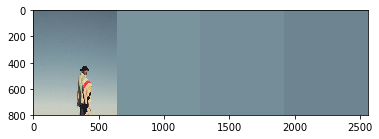


Most prominent color:
red: 233  green:  233  blue:  231 
Hex:  #e9e9e7

Second color:
red: 228  green:  233  blue:  224 
Hex:  #e4e5e0

Third color:
red: 212  green:  233  blue:  205 
Hex:  #d4d3cd


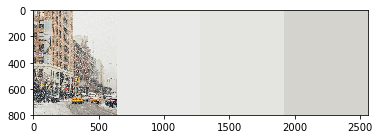


Most prominent color:
red: 221  green:  222  blue:  219 
Hex:  #dddedb

Second color:
red: 191  green:  222  blue:  185 
Hex:  #bfbeb9

Third color:
red: 153  green:  222  blue:  148 
Hex:  #999a94


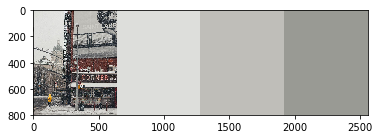


Most prominent color:
red: 25  green:  26  blue:  31 
Hex:  #191a1f

Second color:
red: 27  green:  26  blue:  36 
Hex:  #1b1f24

Third color:
red: 17  green:  26  blue:  24 
Hex:  #111518


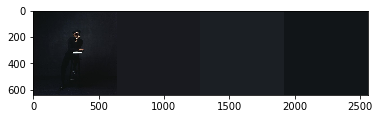

In [135]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--imagePath", required=True,
# 	help="Path to image to find dominant color of")
# ap.add_argument("-k", "--clusters", default=3, type=int,
# 	help="Number of clusters to use in kmeans when finding dominant color")
# args = vars(ap.parse_args())


for i in glob.glob('fohrtest/*'):
    #read in image of interest
    bgr_image = cv2.imread(i)
    #convert to HSV; this is a better representation of how we see color
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    
    #extract 3 most dominant colors
    # (aka the centroid of the most popular k means cluster)
    dom_color_1, dom_color_2, dom_color_3 = get_dominant_color(hsv_image, k=35)
    
    #create a square showing dominant color of equal size to input image
    dom_color_1_hsv = np.full(bgr_image.shape, dom_color_1, dtype='uint8')
    #convert to bgr color space for display
    dom_color_1_rgb = cv2.cvtColor(dom_color_1_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_2_hsv = np.full(bgr_image.shape, dom_color_2, dtype='uint8')
    #convert to bgr color space for display
    dom_color_2_rgb = cv2.cvtColor(dom_color_2_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_3_hsv = np.full(bgr_image.shape, dom_color_3, dtype='uint8')
    #convert to bgr color space for display
    dom_color_3_rgb = cv2.cvtColor(dom_color_3_hsv, cv2.COLOR_HSV2RGB)
    
    #concat input image and dom color square side by side for display
    output_image = np.hstack((bgr_image[:,:,::-1], dom_color_1_rgb, dom_color_2_rgb, dom_color_3_rgb))
    
    #show results to screen
    print('\nMost prominent color:\nred:', dom_color_1_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_1_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], 
                                                                             dom_color_1_rgb[0][0][1], 
                                                                             dom_color_1_rgb[0][0][2]))
    
    print('\nSecond color:\nred:', dom_color_2_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_2_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], 
                                                                             dom_color_2_rgb[0][0][1],
                                                                             dom_color_2_rgb[0][0][2]))
    
    print('\nThird color:\nred:', dom_color_3_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_3_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], 
                                                                             dom_color_3_rgb[0][0][1], 
                                                                             dom_color_3_rgb[0][0][2]))
    plt.imshow(output_image)
    plt.show()

In [52]:
dom_color = [94, 98, 88]
print('#%02x%02x%02x' % (int(dom_color[2]), int(dom_color[1]), int(dom_color[0])))

#58625e


Test of getting the Hue Saturation and Value

In [ ]:
image = cv2.imread('fohrimage.jpg')
image = cv2.resize(image,(224,224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [ ]:
image.shape

In [80]:
oriimg = cv2.imread('./fohrtest/fohrimage3.jpg',cv2.COLORMAP_HSV)
img = cv2.resize(oriimg,(50,50))

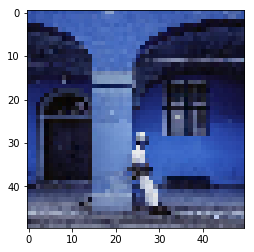

In [81]:
plt.imshow(img)

In [82]:

img = img.reshape((img.shape[0] * img.shape[1], 3))

    #cluster and assign labels to the pixels 
clt = KMeans(n_clusters = 35)
labels = clt.fit_predict(img)

    #count labels to find most popular
label_counts = Counter(labels)

    #subset out most popular centroid
dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]


In [83]:
dominant_color

array([15.45856354, 14.42541436, 27.59668508])

In [111]:
label_counts.most_common(3)[1][0]

23

In [137]:
hex1 = '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], dom_color_1_rgb[0][0][1], dom_color_1_rgb[0][0][2])
hex2 = '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], dom_color_2_rgb[0][0][1], dom_color_2_rgb[0][0][2])
hex3 = '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], dom_color_3_rgb[0][0][1], dom_color_3_rgb[0][0][2])

In [148]:
color_dict = {'first_color':{'red': int(dom_color_1_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_1_rgb[0][0][2]), 
'hex': hex1}, 'second_color':{'red': int(dom_color_2_rgb[0][0][0]), 'green':int(dom_color_1_rgb[0][0][1]), 'blue: ': int(dom_color_2_rgb[0][0][2]), 'hex': hex2}, 
              'third_color':{'red': int(dom_color_3_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_3_rgb[0][0][2]), 
'hex': hex3}}

In [149]:
type(color_dict['first_color']['hex'])

str

In [150]:
print(json.dumps(color_dict))

{"first_color": {"red": 25, "green": 26, "blue": 31, "hex": "#191a1f"}, "second_color": {"red": 27, "green": 26, "blue: ": 36, "hex": "#1b1f24"}, "third_color": {"red": 17, "green": 26, "blue": 24, "hex": "#111518"}}
